# ReachOut - reaching movement kinematics analysis - Part2 (Analysis)
___

## This Notebook containing the scripts to extract, refine and classify the trajectories:


### 3. Open the csv file, scroll through the trajectories and manually choose the fragments of the trajectory with the reaches for analysis
This script will ask you to choose a file with the OpenFile interface. Point it to the _*.csv_ file generated by the previous notebook. It will open the GUI to review the 3d trajectory and extract the fragments of the trajectory for further analysis. You can choose from two methods - entirely manual or semi-automatic with manual refinement.
As a result of this step you will have the _*.h5_ file with the fragments of the trajectory that you've chosen. Open this file to review the trajectories.  

### 4. Open the h5 file and the corresponding video to review and classify the trajectories

For this script to work point it to the _*.h5_ file you want to analyze (file) and the video corresponding to the same session (file2.mp4) and then use the GUI to rewatch the video fragments and manually assign the labels.
As a result of this step you will have the _*scalars.h5_ file which is used in the vizualisation steps 5 and 6.

  
  
  ***
  ___










# Analysis part
---

#### 3. Open the csv file, scroll through the trajectories

The following program snippet allows you to open the csv file with Anipose output and scroll through the traejctories, visualizing them as a 3d plot + 2 projections: to X and Y axis. 
**Scroll** by moving the slider at the very bottom. **The 3d plot can be rotated** by howering on top of it with the mouse and holding left button.
Also when you move your mouse to the left lower X-projection plot and hold the left button you can choose the smaller part of the trajectory to visualize with a **span selector**. 
If after close inspection you find this part of the trajectory useful for further analysis (it looks like a valid reach or any other action you are after), you should press the left **Save button** to add it to the resulting output table.
The **Save_all button** on the right saves the resulting table with all the parameters as a *.h5* file for further analysis.

The parameters calculated and added to the table at this step:

Taken from original csv file
* paw_x
* paw_y
* paw_z
* paw_error
* paw_score

Calculated and added as new columns
* dX
* dY
* dZ
* dE
* time
* time_diff
* velocity
* acceleration
* jerk


The resulting *.h5 file contains two keys:
* data - pd dataframe containing the updated data table loaded from csv
* reach_index - list of arrays containing start and stop frame for all the reaches chosen


In [1]:
%matplotlib notebook
# for more dynamic programs like this one we are switching to the interactive matplotlib backend

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


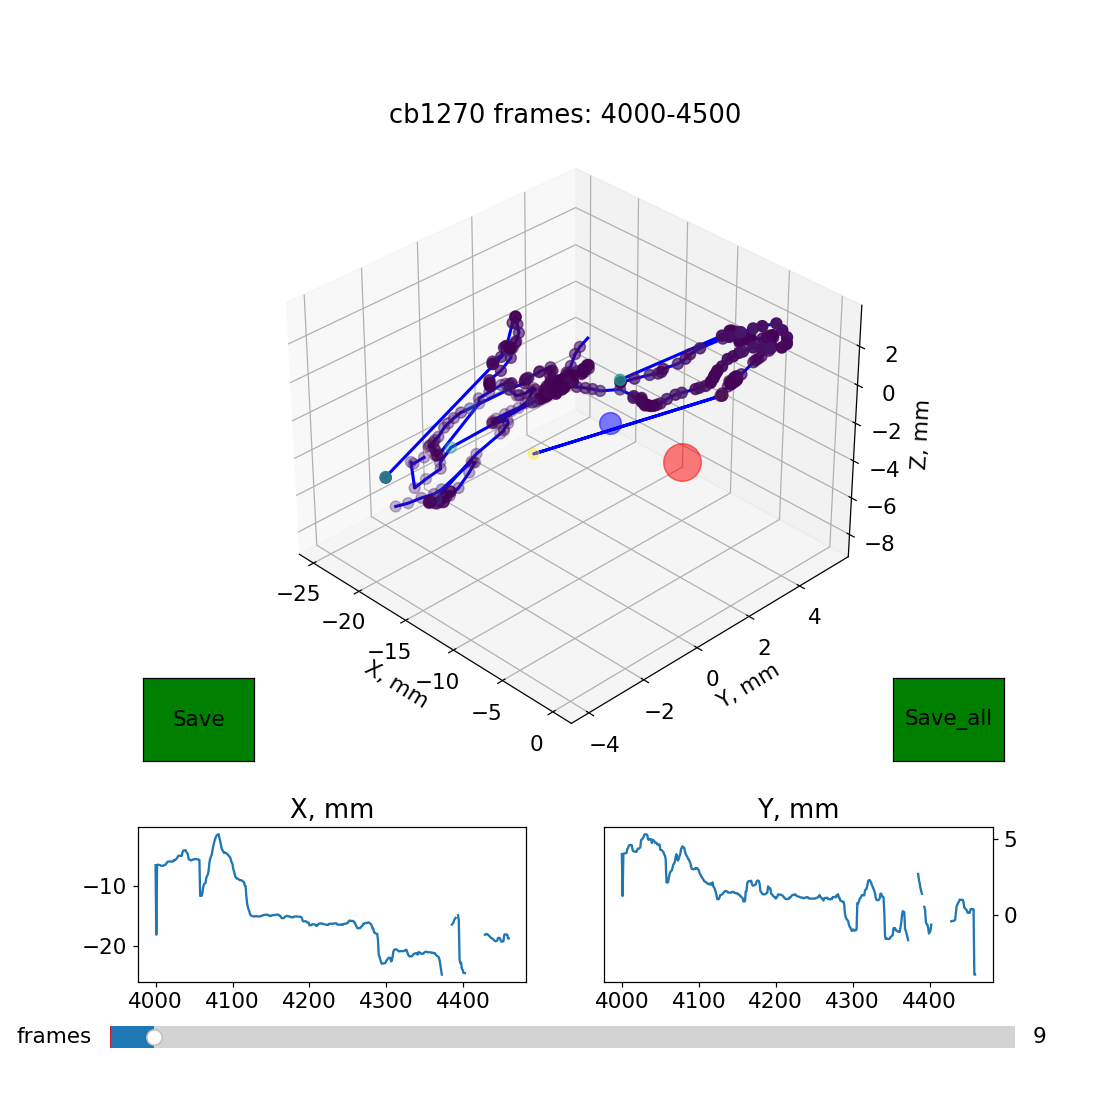

In [3]:
#Entirely manual extraction

import tracking_split
usecols = ['paw_x','paw_y','paw_z','paw_error','paw_score'] #choose all columns corresponding to the part you analyze
fps = 100                                                   #choose the framerate of your video
length = 500                                                #choose the size of the analysis window
tracking = tracking_split.TrackingViewer(usecols, fps, length)

In [12]:
#Automatic extraction with manual correction
#Note: you will have to tweak the parameters for the peak extraction to match your data

import tracking_split_automatic
usecols = ['paw_x','paw_y','paw_z','paw_error','paw_score'] #choose all columns corresponding to the part you analyze
fps = 100                                                   #choose the framerate of your video
length = 1000                                                #choose the size of the analysis window
### Parameters for peak detection algorithm ###
start = -12                                                 #only reaches from this point are detected (lower border)
thres = -5                                                  #only reaches beyoung this point are detected (upper border)
peak_width = [5,50]                                         #min and max reach duration (in points/frames)

tracking = tracking_split_automatic.TrackingViewer(usecols, fps, length, start, thres, peak_width)

FileNotFoundError: [Errno 2] No such file or directory: ''

#### 4. Open the h5 file and the corresponding video to review and classify the trajectories
The following program opens the file with all the trajectories saved on the previous step, along with the video file **(the path to both should be typed in the following cell)**
Left dropdown list shows all the reaches with the corresponding frames in a video. As soon as you choose one the popup window will show the corresponding part of the video. To **close the window** type Q on the keyboard. After inspecting the video an accompanying plots **mark the reach** with one of the categories on the right. By default all the reaches are marked as the first option in the provided list (Missed) or the last chosen option in the **right list**. As soon as you click on one of the options, the label for the current reach gets updated. When you finish **click Save** to write down the changes to the file. The file is saved with the same name as the input file with added *_scalar.h5* suffix and used in all the visualization steps. 

The parameters calculated for every reach at this step, effectively describing every reach:

* time_difference
* dX
* dY
* dZ
* dE
* maxX
* minX
* min_abs_X
* maxY
* minY
* min_abs_Y
* maxZ
* minZ
* min_abs_Z
* mean_velocity
* mean_acceleration
* mean_jerk
* max_velocity
* max_acceleration
* max_jerk
* max_velocity_position
* maxX_position
* minY_position
* maxZ_position

The resulting *_scalar.h5* file contains four keys:

* cleared_data - pd dataframe, the copy of raw data table with only chosen reaches left, all other timepoints as NaNs 
* reaches - pd dataframe with start and stop position and category assigned for every reach
* mean - pd dataframe with parameters as columns and reaches as indexes, includes the group column with reach type
* std - similar to mean, pd dataframe with parameters (STDs) as columns and reaches as indexes

In [14]:
%matplotlib inline 
# we are changing back the interface from the interactie to static 

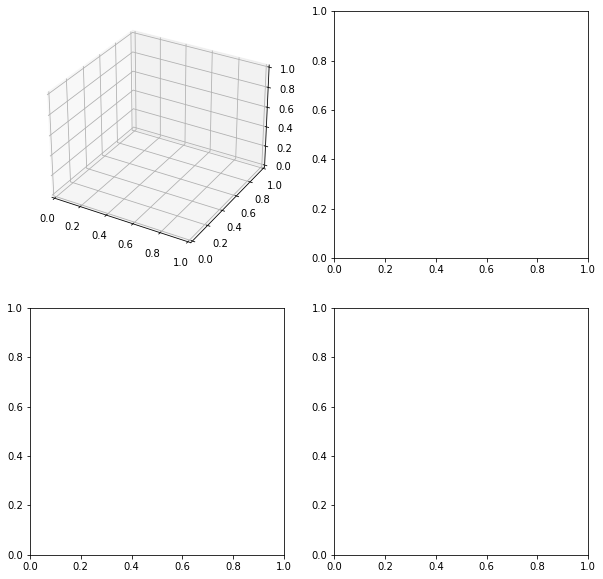

In [22]:
import viewer
directory = 'C:/Users/daniil.berezhnoi.VAI/Videos/3d plot - manual assembly/Data_2023 (batch7-11)/additional/'     #enter the analysis folder
video_filename = 'mj_17_13_44_ncb1405-R-camB.mp4'                # enter the filename for the video (must be in the same folder)
df_filename = 'mj_17_13_44_ncb1405-R.h5'                 # enter the filename for the dataframe 
options = ['Miss', 'Flick', 'In vain', 'Drop', 'Success','Artefact']  # enter the options for labeling
file = directory+video_filename
file2 = directory+df_filename

view = viewer.ReachesViewer(file, file2, options)

In [ ]:
import viewer_automatic
directory = 'C:/Users/daniil.berezhnoi.VAI/Desktop/Current Experiments/Ca Imaging/1280-7/'     #enter the analysis folder
video_filename = 'mj_16_46_54_ncb1280-camB.mp4'                # enter the filename for the video (must be in the same folder)
df_filename = 'mj_16_46_54_ncb1280.h5'                 # enter the filename for the dataframe 
options = ['Missed', 'In vain', 'Lost', 'Grasped','Artefact']  # enter the options for labeling
file = directory+video_filename
file2 = directory+df_filename
file3 = directory+'finalized_model.sav'

view = viewer_automatic.ReachesViewer(file, file2, file3, options)

### The end of the second notebook. Proceed to part 3
The result of this notebook is the _scalar.h5 file with the list of the reaches, cleared dataframe with only the fragments extracted for analysis and 2 dataframes with all the parameters calculated for every reach - mean and std.
You can open it in the next notebook for additional clustering and visualization of the reaches.